# Tensorflow

#### What's Tensorflow

- Tensorflow is a python-based, free,open source machine learning platform, developed primarly by Google - Like numpy, the primarely purpose of tensorflow is to enable engineers to manipualte numerical tensors
- TF can automatically compute the gradien of any differentiable expression
- It can run on CPU,GPU and TPU


#### What's Keras

- Keras is a deep learning API for python, built on top of Tensorflow, that provides a convient way to define and train any kind of deep learning model
- Keras is an API

- Keras: Deep learning development, layers, models, optimizers and losses
- Tensorflow: Tensor Manipulation, infrastructure, automatic differentiator 

Tensorflow is a low-level tensor computing platform, and keras is a high-l;evel deep learning API

ML in a Nutshell:
- Low-Level Manipulation using Tensorflow's API:
    - Tensors - store network's state
    - Tensor Operations - relu,matmul
    - Backpropagation: compute the gradient of a mathematical expression
- High-Level deep learning concepts
    - Layers - Combined in to a Model
    - Loss Function - Defines the feedback signal used for learning
    - Optimizer - How learning should proceed
    - Metrics - Evaluates the model
    - Training Loop - Performs mini-batch stochastic gradient descent

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))

2022-11-26 17:25:33.930105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 17:25:36.722551: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 17:25:36.722578: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-26 17:25:45.761539: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
# Random Tensors

x = tf.random.normal(shape=(3,1), mean=0, stddev=1.)

In [4]:
print(x)

tf.Tensor(
[[-1.48006   ]
 [ 1.8485434 ]
 [-0.10551233]], shape=(3, 1), dtype=float32)


In [5]:
import numpy as np

x = np.ones(shape=(2,2))

In [7]:
x[0,0] = 0

x = tf.ones(2,2)
x[0,0] =0 

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

tf.Variables -> is the class meant to manage modifiable state in Tensorflow

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [11]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.8047771 ],
       [-0.73575366],
       [-1.5334953 ]], dtype=float32)>


In [13]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v[0,0].assign(3)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [18]:
#Gradient Tape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

In [19]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [24]:
#Gradient Tape constant tensofr
input_var = tf.constant(3)
with tf.GradientTape() as tape:
    tape.watch(input_var)
    result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

In [25]:
gradient

# 2D Linear Classifier

In [28]:
num_samples_per_class = 1000

positive_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class)

negative_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class)


In [30]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [33]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                     np.ones((num_samples_per_class,1),dtype="float32")))

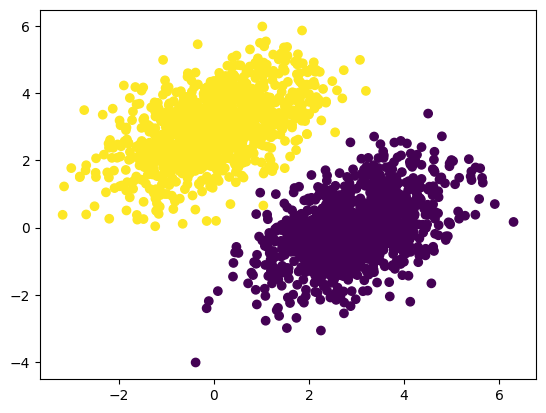

In [34]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

#### Creating a Linear Classifier 

In [36]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [37]:
## The forward Pass Function
def model(inputs):
    return tf.matmul(inputs,W) + b

#### Creating a Loss Function

In [38]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)

#### Training Step Function

In [41]:
learning_rate = 0.1

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [42]:
#### Training Step Function
for step in range(40):
    loss = training_step(inputs,targets)
    print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 1.8555
Loss at step 1: 0.1381
Loss at step 2: 0.0993
Loss at step 3: 0.0895
Loss at step 4: 0.0833
Loss at step 5: 0.0781
Loss at step 6: 0.0733
Loss at step 7: 0.0690
Loss at step 8: 0.0651
Loss at step 9: 0.0616
Loss at step 10: 0.0583
Loss at step 11: 0.0554
Loss at step 12: 0.0527
Loss at step 13: 0.0503
Loss at step 14: 0.0481
Loss at step 15: 0.0460
Loss at step 16: 0.0442
Loss at step 17: 0.0425
Loss at step 18: 0.0410
Loss at step 19: 0.0396
Loss at step 20: 0.0384
Loss at step 21: 0.0373
Loss at step 22: 0.0362
Loss at step 23: 0.0353
Loss at step 24: 0.0344
Loss at step 25: 0.0336
Loss at step 26: 0.0329
Loss at step 27: 0.0323
Loss at step 28: 0.0317
Loss at step 29: 0.0312
Loss at step 30: 0.0307
Loss at step 31: 0.0302
Loss at step 32: 0.0298
Loss at step 33: 0.0295
Loss at step 34: 0.0291
Loss at step 35: 0.0288
Loss at step 36: 0.0286
Loss at step 37: 0.0283
Loss at step 38: 0.0281
Loss at step 39: 0.0279


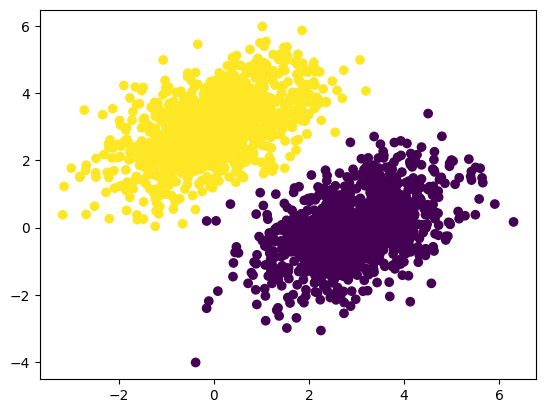

In [44]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

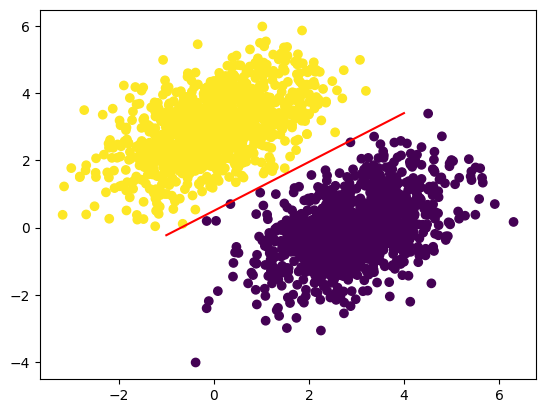

In [46]:
x = np.linspace(-1,4,100)
y = -W[0]/W[1]*x + (0.5-b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)

In [48]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self,units,activation=None):
        super().__init__()
        self.units =units
        self.activation = activation
    
    def build(self,input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim,self.units),
                                 initializer ="random_normal")
        self.b = self.add_weight(shape=(self.units),
                                 initializer = "zeros")
    def call(self,inputs):
        y = tf.matmul(inputs,self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y


In [49]:
my_dense = SimpleDense(units=32, activation = tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


Bad pipe message: %s [b'|qy?\x9e@{>\xddy\x1c\x96\xc8NC`A\xdc h.\xf1\xc6%\x0c\xe3\x05\xbf\xdd\x94T.v\xc7\x8a\x02_ne\x98\xb7\x14\xbf\xbfL\x14\xc4J%ak\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01']
Bad pipe message: %s [b'{\xc9N\x84\xcb9\xd2O\xf1\x1aq\x8b\xff%\x80\xf0\xfc, 8\xcb\x99\xfdUg[\xa5\x13\x9e\x91\x1b\xbcM\xaf\xf6\x99+\xcf\xc5\xe4\xf6+\x1et.\x96`\x8a\xc5g9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08']
Bad pip

Explaining fit
 - inputs - the input examples as numpy arrays
 - targets - The labels or true values 
 - epochs = 5 - The training loop will iterate the data 5 times
 - batch_size - the training loop will iterate over the dta in batches of 128 examples